<a href="https://colab.research.google.com/github/Nooshin-Bsp/CDD-ML-Part-1-Bioactivity-Data-Concised/blob/main/First_colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


#Normalizing

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


#One_hot encoding

In [ ]:
y_train[0]

array([6], dtype=uint8)

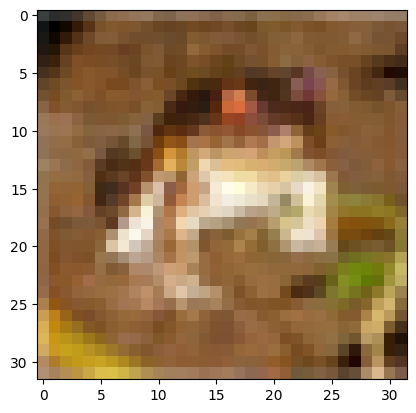

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
num_class = y_test.shape[1] #10

#bulding model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(num_class, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)       

#trainig the model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 14s 12ms/step - loss: 1.5351 - accuracy: 0.4523 - val_loss: 1.2747 - val_accuracy: 0.5501
Epoch 2/30
782/782 [==============================] - 9s 12ms/step - loss: 1.0889 - accuracy: 0.6171 - val_loss: 0.9021 - val_accuracy: 0.6877
Epoch 3/30
782/782 [==============================] - 9s 12ms/step - loss: 0.9311 - accuracy: 0.6720 - val_loss: 0.8084 - val_accuracy: 0.7188
Epoch 4/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8488 - accuracy: 0.7078 - val_loss: 0.7594 - val_accuracy: 0.7359
Epoch 5/30
782/782 [==============================] - 9s 12ms/step - loss: 0.7775 - accuracy: 0.7320 - val_loss: 0.7004 - val_accuracy: 0.7533
Epoch 6/30
782/782 [==============================] - 9s 12ms/step - loss: 0.7365 - accuracy: 0.7434 - val_loss: 0.6399 - val_accuracy: 0.7775
Epoch 7/30
782/782 [==============================] - 9s 12ms/step - loss: 0.7010 - accuracy: 0.7570 - val_loss: 0.6483 - val_accuracy: 0.78

In [ ]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [ ]:
import pandas as pd

<Axes: >

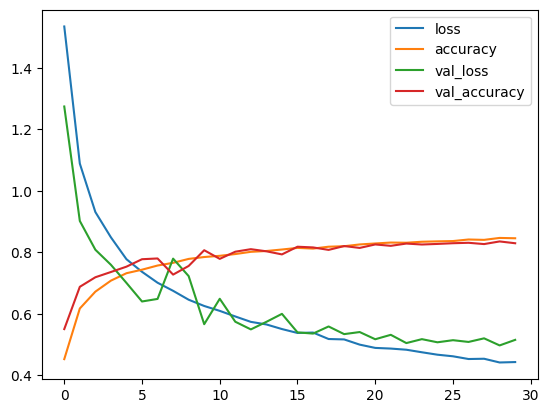

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.save('CNN_cifar10.h5')

In [ ]:
model2 = load_model('CNN_cifar10.h5')

In [ ]:
import numpy as np

In [ ]:
np.argmax(model2.predict(X_test[0:10])[4])

1/1 [==============================] - 0s 19ms/step


6

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
labels[6]

'frog'